# Perceptron Learning Algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dim = 2

In [35]:
np.random.seed(0)
true_w = np.random.sample(dim + 1)
true_w

array([0.5488135 , 0.71518937, 0.60276338])

In [4]:
def h(w, x):
    if np.dot(w, x) > 0:
        return 1
    else:
        return -1

In [5]:
def update_w_t_iter(w_t, true_w, data, num_of_iter):
    updated_w_t = w_t
    for i in range(num_of_iter):
        updated_w_t = update_w_t(updated_w_t, true_w, data, i)
    return updated_w_t

def update_w_t(w_t, true_w, data, iter_num):
    y_output = np.where(np.dot(data, true_w) > 0, 1, -1)
    w_t_output = np.where(np.dot(data, w_t) > 0, 1, -1)
    agreement = np.where(np.dot(data, w_t) > 0, 1, -1)*np.where(np.dot(data, true_w) > 0, 1, -1)
    indices_of_wrong_predictions = np.where(agreement == -1)
    num_of_error = indices_of_wrong_predictions[0].size
    print("Iter {}: Error: {}".format(iter_num, num_of_error))
    if num_of_error > 0:
        x_t = data[indices_of_wrong_predictions[0][0]]
        # w_(t+1) = w_t + y(t) x(t)
        w_t_1 = w_t + y_output[indices_of_wrong_predictions[0][0]]*x_t
        return w_t_1
    else:
        return w_t

In [6]:
def y(true_w, x):
    if np.dot(true_w, x) > 0:
        return 1
    else:
        return -1

In [7]:
def cartesian_y(w, cartesian_x):
    WEIGHT_INDEX_FOR_CARTESIAN_Y = 2
    WEIGHT_INDEX_FOR_CARTESIAN_X = 1
    WEIGHT_INDEX_FOR_BIAS = 0
    
    cartesian_y = -(w[WEIGHT_INDEX_FOR_CARTESIAN_X]*cartesian_x + w[WEIGHT_INDEX_FOR_BIAS]*1)/w[WEIGHT_INDEX_FOR_CARTESIAN_Y]
    return cartesian_y

In [8]:
# Suppose our line is y = 3x + 4. Then w = [-4, -3, 1]. We expect cartesian_y(w, 0) = 4, cartesian_y(w, 5) = 19
w = [-4, -3, 1]
cartesian_y(w, 5)

19.0

In [15]:
np.random.seed(10)
# data will be (x, y) points limited to (-3, -3) to (3, 3)
NUM_OF_POINTS = 100
data = 6*np.random.sample((NUM_OF_POINTS, 2)) - 3
bias = np.ones((NUM_OF_POINTS, 1))
data = np.column_stack((bias, data))
DATA_INDEX_OF_BIAS = 0
DATA_INDEX_OF_X = 1
DATA_INDEX_OF_Y = 2

true_color = np.array(['b' if y(true_w, x) == 1 else 'r' for x in data])

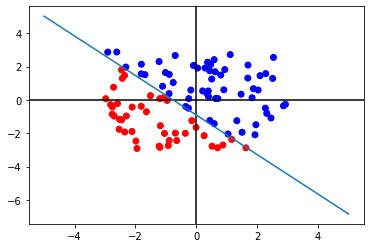

In [27]:
# Init the clasisification for each point. Note that we classify based off a 'true weight'. 
# PLA with a linear update rule converges iff a linear boundary exists.
fig, ax = plt.subplots(1,1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

x = np.linspace(-5, 5, 1000)
ax.plot(x, cartesian_y(true_w, x))

ax.scatter(data[:, DATA_INDEX_OF_X], data[:, DATA_INDEX_OF_Y], c=true_color)

In [32]:
# Init hypothesis weights
np.random.seed(5)
w_t = np.random.rand(dim+1)
w_t

array([0.22199317, 0.87073231, 0.20671916])

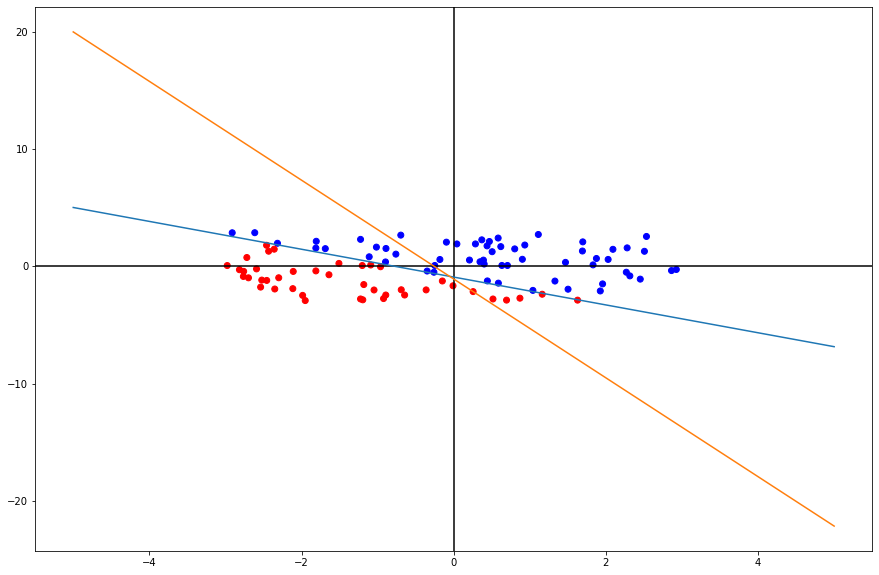

In [33]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

x = np.linspace(-5, 5, 1000)
ax.plot(x, cartesian_y(true_w, x))
ax.plot(x, cartesian_y(w_t, x))

ax.scatter(data[:, DATA_INDEX_OF_X], data[:, DATA_INDEX_OF_Y], c=true_color)

Iter 0: Error: 20
Iter 1: Error: 33
Iter 2: Error: 19
Iter 3: Error: 21
Iter 4: Error: 13
Iter 5: Error: 10
Iter 6: Error: 15
Iter 7: Error: 9
Iter 8: Error: 9
Iter 9: Error: 16
Iter 10: Error: 10
Iter 11: Error: 11
Iter 12: Error: 12
Iter 13: Error: 15
Iter 14: Error: 8
Iter 15: Error: 5
Iter 16: Error: 8
Iter 17: Error: 15
Iter 18: Error: 6
Iter 19: Error: 3
Iter 20: Error: 2
Iter 21: Error: 17
Iter 22: Error: 7
Iter 23: Error: 5
Iter 24: Error: 15
Iter 25: Error: 8
Iter 26: Error: 8
Iter 27: Error: 13
Iter 28: Error: 6
Iter 29: Error: 3
Iter 30: Error: 8
Iter 31: Error: 7
Iter 32: Error: 6
Iter 33: Error: 12
Iter 34: Error: 4


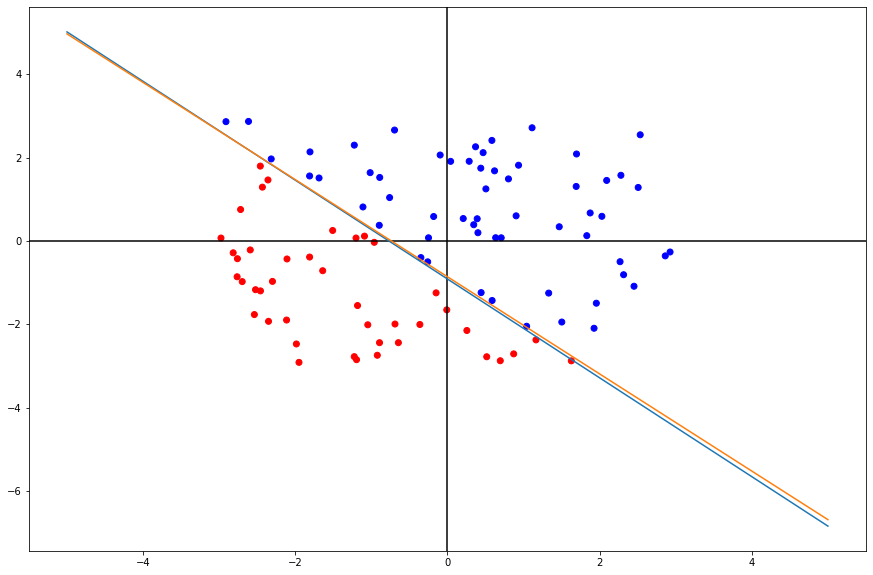

In [34]:
updated_w_t = update_w_t_iter(w_t, true_w, data, 35)
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

x = np.linspace(-5, 5, 1000)
ax.plot(x, cartesian_y(true_w, x))
ax.plot(x, cartesian_y(updated_w_t, x))

ax.scatter(data[:, DATA_INDEX_OF_X], data[:, DATA_INDEX_OF_Y], c=true_color)